# Nationalhymnen: Analyse der Midi-Dateien
### Ressourcen: 
Die hier verwendeten Midi-Dateien stammen aus zwei Quellen: 
* https://www.kaggle.com/awesomepgm/national-anthems-of-every-country: Datenbank mit allen Midi-Dateien. 
* https://www.midiworld.com/search/1/?q=national%20anthems

In [53]:
# Importieren der nötigen Biliotheken.
from music21 import converter, corpus, instrument, midi, note, chord, pitch
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Funktion zum Importieren der Midi-Datei. Der Rhythmuskanal wird deaktiviert. 
def open_midi(midi_path, remove_drums):
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    if (remove_drums):
        for i in range(len(mf.tracks)):
            mf.tracks[i].events = [ev for ev in mf.tracks[i].events if ev.channel != 10]          
    return midi.translate.midiFileToStream(mf)

In [55]:
# Funktion zur Musikanalyse. 
def musikanalyse(midi):
    timeSignature = midi.getTimeSignatures()[0]
    taktart = str(timeSignature.beatCount) + '/' + str(timeSignature.denominator)
    music_analysis = midi.analyze('key')
    tonart = music_analysis
    wahrscheinlichkeit = music_analysis.correlationCoefficient
    return [taktart, str(tonart), wahrscheinlichkeit]   

In [56]:
# Importieren der Basisinformationen. 
df = pd.read_csv('länderübersicht.csv', index_col='index')

In [57]:
# Die Ton- und Taktart wird bestimmt. 
analyse_dict = dict()

for index, row in df.iterrows():
    try:
        base_midi = open_midi('midi/' + row['midi'], True)
        analyse_dict[index] = musikanalyse(base_midi)
    except:
        pass

# Die Informationen werden dem DataFrame angefügt. 
df = pd.merge(df[['midi']], pd.DataFrame.from_dict(analyse_dict, orient='index', columns=['taktart', 'tonart', 'tonart_prob']), left_index=True, right_index=True)

In [77]:
df.head()

,midi,taktart,tonart,tonart_prob
Afghanistan,afghanistan.mid,4/4,E- major,0.896338
Ägypten,egypt.mid,4/4,F major,0.903261
Albanien,albania.mid,4/4,G major,0.910018
Algerien,algeriea.mid,4/4,F major,0.908971
Andorra,andorra.mid,4/4,G major,0.847000


In [71]:
# Wie lange dauert die Hymne? 

In [ ]:
# Wie hoch ist das Metrum?

In [ ]:
# Wie gross ist der durchschnittliche Notenwert? (Allenfalls können so "getragene" von "wirbligen" Hymnen
# unterschieden werden.)

In [73]:
# Weitere Möglichkeit: Welche Instrumente kommen in der betreffenden Midi-Datei zum Einsatz?
def list_instruments(midi):
    partStream = midi.parts.stream()
    for p in partStream:
        aux = p
        print (p.partName)

list_instruments(base_midi)

StringInstrument
StringInstrument


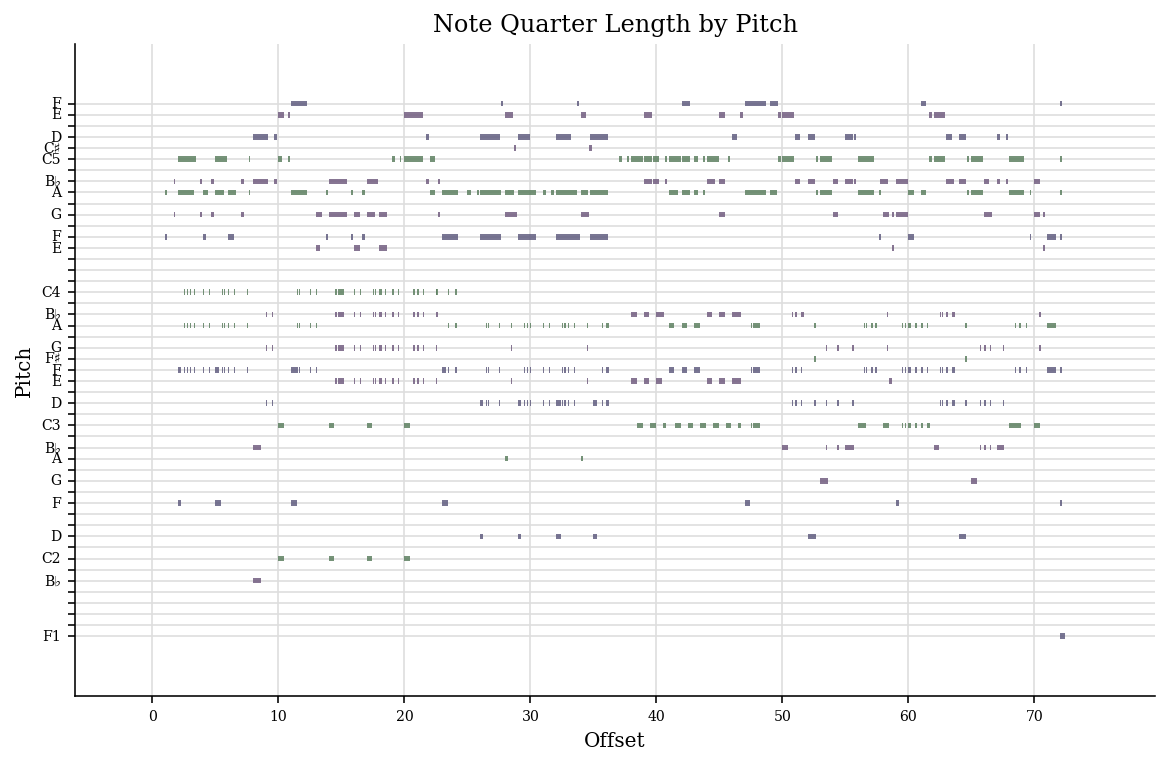

In [61]:
# Weitere Möglichkeit: Ein Diagramm wird gezeichnet. 
base_midi.plot()

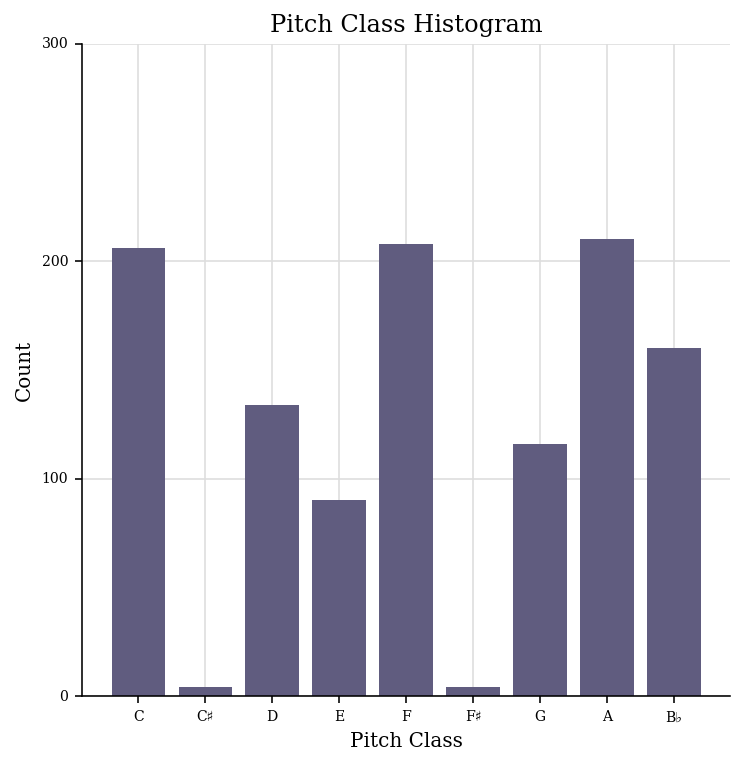

In [75]:
# Welche Töne werden wie oft gespielt? 
base_midi.plot('histogram', 'pitchClass', 'count')

In [ ]:
# Gibt es Ähnlichkeien zu anderen Hymnen? 